# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-04-04 14:12:11--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-04-04 14:12:12--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

cus

In [2]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [3]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [4]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [6]:
print("Valores nulos en cada columna:")
print(df.isnull().sum())

print("\nDuplicados en el DataFrame:")
print(df.duplicated().sum())

Valores nulos en cada columna:
invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

Duplicados en el DataFrame:
0


No existen valores nulos ni duplicados en esta base de datos.

## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [7]:
df['total_value'] = df['quantity'] * df['price']
df.head ()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_value
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [8]:
df['average purchase value'] = df['total_value'] / df['quantity']
df.head ()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_value,average purchase value
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,1500.40
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,1800.51
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,3000.85
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,60.60


In [9]:
df['frequency of purchase'] = df.groupby('customer_id')['customer_id'].transform('count')
print(df.head())

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  total_value  \
0    Credit Card     5/8/2022          Kanyon      7502.00   
1     Debit Card   12/12/2021  Forum Istanbul      5401.53   
2           Cash    9/11/2021       Metrocity       300.08   
3    Credit Card   16/05/2021    Metropol AVM     15004.25   
4           Cash   24/10/2021          Kanyon       242.40   

   average purchase value  frequency of purchase  
0                 1500.40                      1  
1                 1800.51                      1  
2                  300.08                      1  
3 

In [10]:
df['average age of purchase'] = df['age'] / df['quantity']

Como se puede evidenciar, agregué diferentes variables derivadas que podrían ser útiles para analizar el comportamiento de compra. Estas son edad promedio de compra, frecuencia de compra, valor promedio de compra.

## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

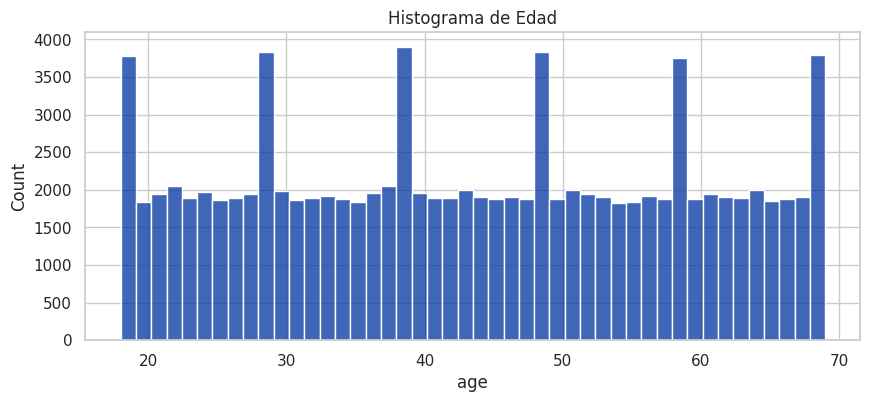

In [11]:
plt.figure(figsize=(10,4))
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']
sns.histplot(df['age'])
plt.title(f'Histograma de Edad')
plt.show()


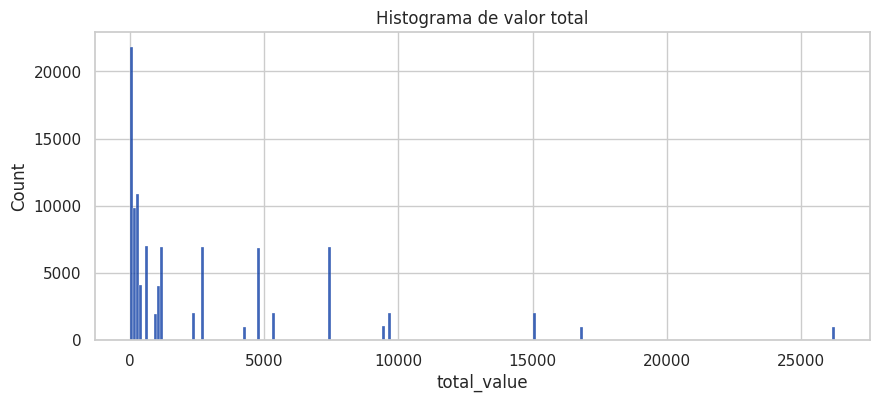

In [12]:
plt.figure(figsize=(10,4))
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']
sns.histplot(df['total_value'])
plt.title(f'Histograma de valor total')
plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'total_value'}>]], dtype=object)

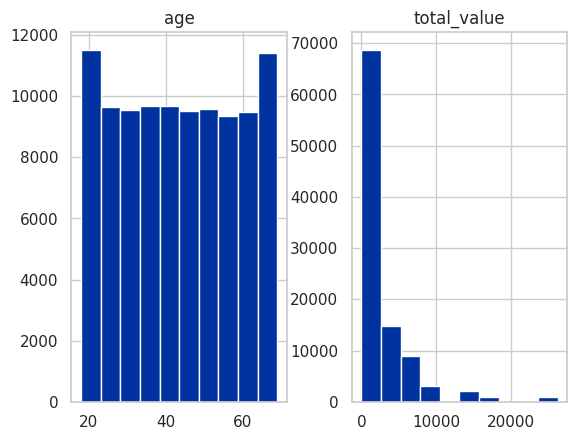

In [13]:
df.hist(column=['age', 'total_value'])

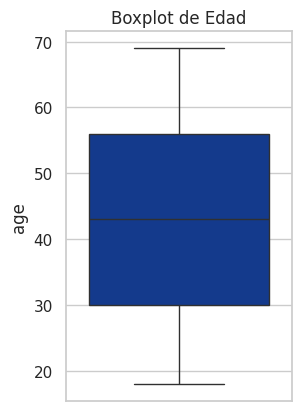

In [14]:
plt.subplot(1,2,2)
sns.boxplot(y=df['age'])
plt.title(f'Boxplot de Edad')

plt.show()

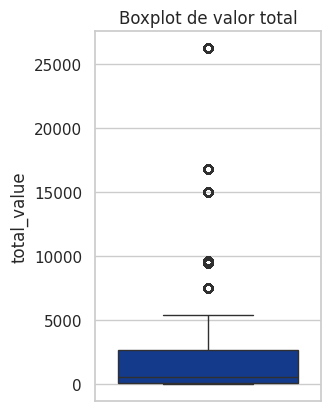

In [15]:
plt.subplot(1,2,2)
sns.boxplot(y=df['total_value'])
plt.title(f'Boxplot de valor total')

plt.show()

<Axes: >

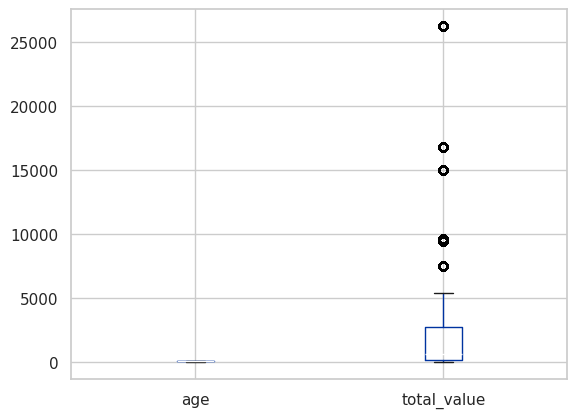

In [16]:
df.boxplot(column=['age', 'total_value'])

 Algunos patrones que requieran atención son que las personas que más compran son jóvenes y mayores más jovenes. Con respecto al el box plot no se evidencia una variación muy grande en los datos.

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

In [17]:
bins_edad = [0, 35, 55, 120]
labels_edad = ['Jóvenes', 'Adultos', 'Mayores']
df['Segmento_Edad'] = pd.cut(df['age'], bins=bins_edad, labels=labels_edad)
df['Segmento_Edad'].value_counts()

,count
Segmento_Edad,
Adultos,38452
Jóvenes,34418
Mayores,26587


<ipython-input-18-4b5073b8cea4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmento_df = df.groupby(['Segmento_Edad', 'gender'])['customer_id'].nunique().reset_index()


  Segmento_Edad  gender  Cantidad_Clientes
0       Jóvenes  Female              20492
1       Jóvenes    Male              13926
2       Adultos  Female              23096
3       Adultos    Male              15356
4       Mayores  Female              15894
5       Mayores    Male              10693


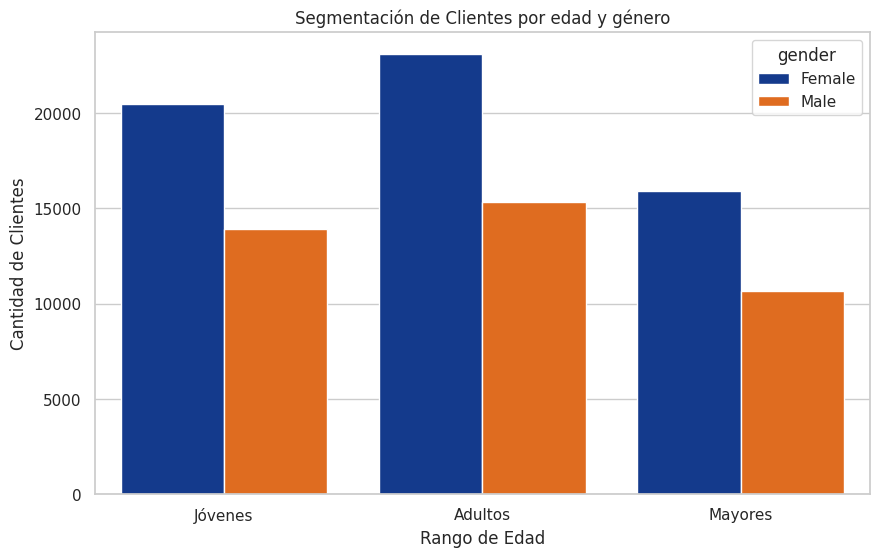

In [18]:
segmento_df = df.groupby(['Segmento_Edad', 'gender'])['customer_id'].nunique().reset_index()
segmento_df = segmento_df.rename(columns={'customer_id': 'Cantidad_Clientes'})

print(segmento_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Segmento_Edad', y='Cantidad_Clientes', hue='gender', data=segmento_df)
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']
plt.title('Segmentación de Clientes por edad y género')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Clientes')
plt.show()

 ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

Compra por categoría

Cantidad de clientes por categoría de productos:
 category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: customer_id, dtype: int64


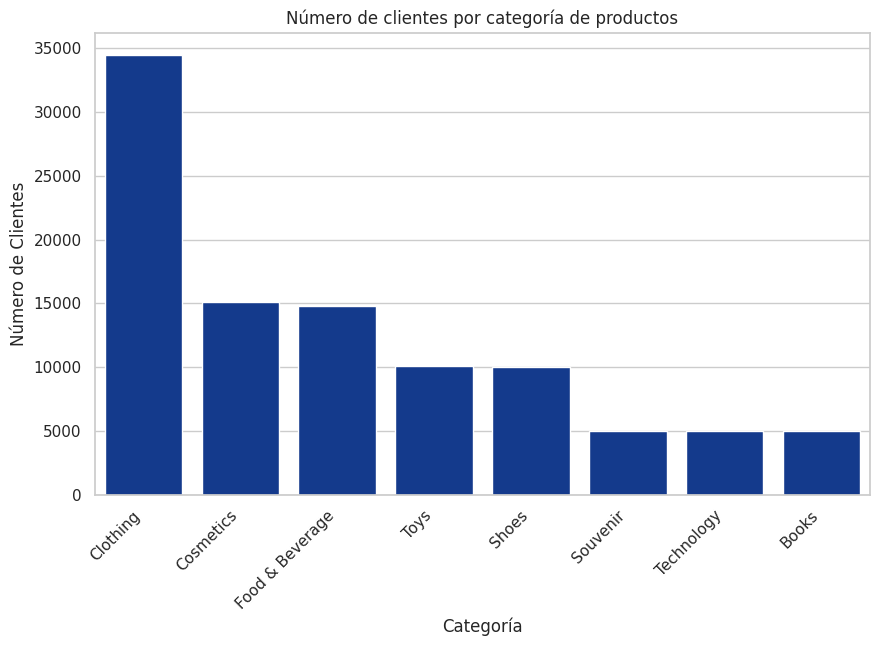

In [19]:
category_counts = df.groupby(['category'])['customer_id'].nunique().sort_values(ascending=False)
print("Cantidad de clientes por categoría de productos:\n", category_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']
plt.title('Número de clientes por categoría de productos')
plt.xlabel('Categoría')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha="right")
plt.show()


Compra por método de pago

Cantidad de clientes por método de pago:
 payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: customer_id, dtype: int64


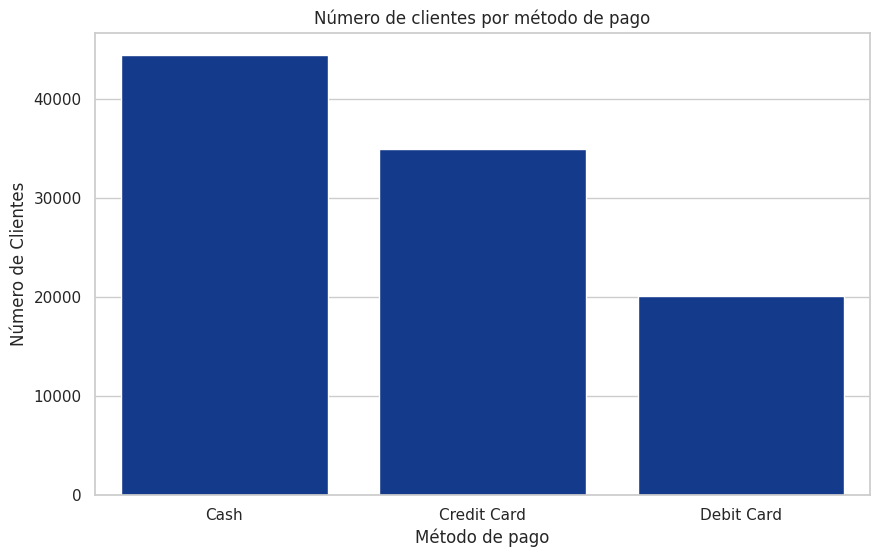

In [20]:
payment_counts = df.groupby(['payment_method'])['customer_id'].nunique().sort_values(ascending=False)
print("Cantidad de clientes por método de pago:\n", payment_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']
plt.title('Número de clientes por método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Número de Clientes')
plt.show()

Compra por centro comercial

Cantidad de clientes por centro comercial:
 shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: customer_id, dtype: int64


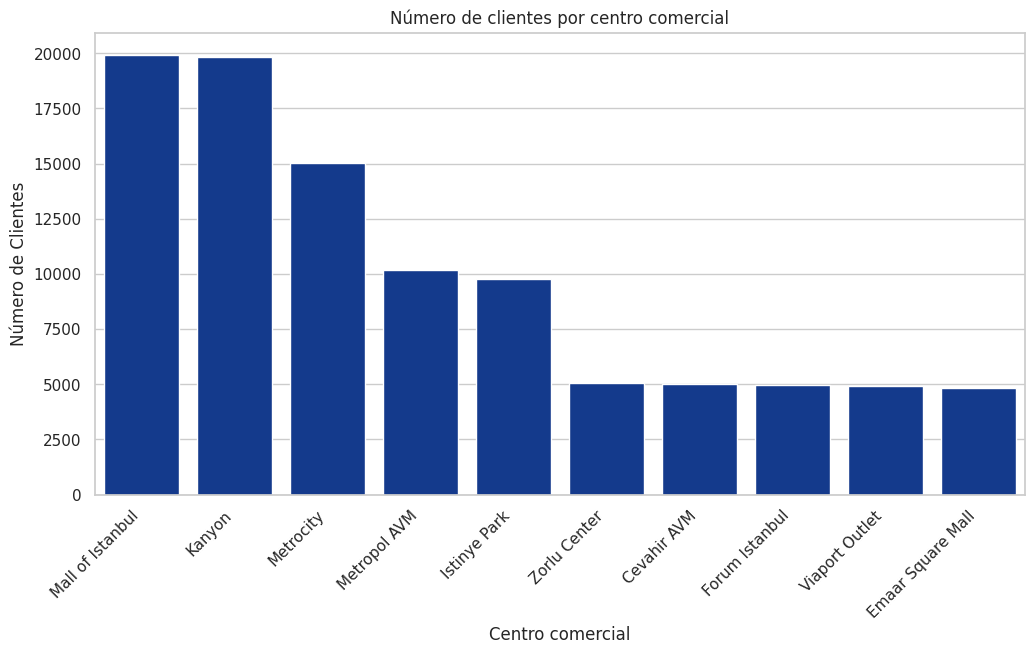

In [21]:
mall_counts = df.groupby(['shopping_mall'])['customer_id'].nunique().sort_values(ascending=False)
print("Cantidad de clientes por centro comercial:\n", mall_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=mall_counts.index, y=mall_counts.values)
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']
plt.title('Número de clientes por centro comercial')
plt.xlabel('Centro comercial')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha="right")
plt.show()


Considero que todos los comportamientos de compra tienen impacto en la estrategia de marketing,pero los más relevantes son la categoría de productos y el centro comercial. La primera nos muestra cuáles son los productos que llaman más la atención de los clientes y así se puede tener más lote de ellos para satisfacer la demanda, asimismo, Los centros comerciales dan el indicio del lugar donde los clientes prefieren comprar y eso ayuda a que se tengan stock de los productos todo el tiempo y se de un foco más especializado a esos puntos de venta. Sin embargo, también son importantes los métodos de pago ya que ayudan a conocer a la audiencia y tener disponible ese método en todos los puntos de venta.

## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

 Segmento de edad y categoría de producto

<ipython-input-22-7d11482a0abd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_counts = df.groupby(['Segmento_Edad', 'category'])['customer_id'].nunique().unstack()


Cantidad de clientes por segmento de edad y categoría:
 category       Books  Clothing  Cosmetics  Food & Beverage  Shoes  Souvenir  \
Segmento_Edad                                                                 
Jóvenes         1708     11951       5171             5126   3478      1738   
Adultos         1921     13320       5868             5715   3880      1894   
Mayores         1352      9216       4058             3935   2676      1367   

category       Technology  Toys  
Segmento_Edad                    
Jóvenes              1713  3533  
Adultos              1982  3872  
Mayores              1301  2682  


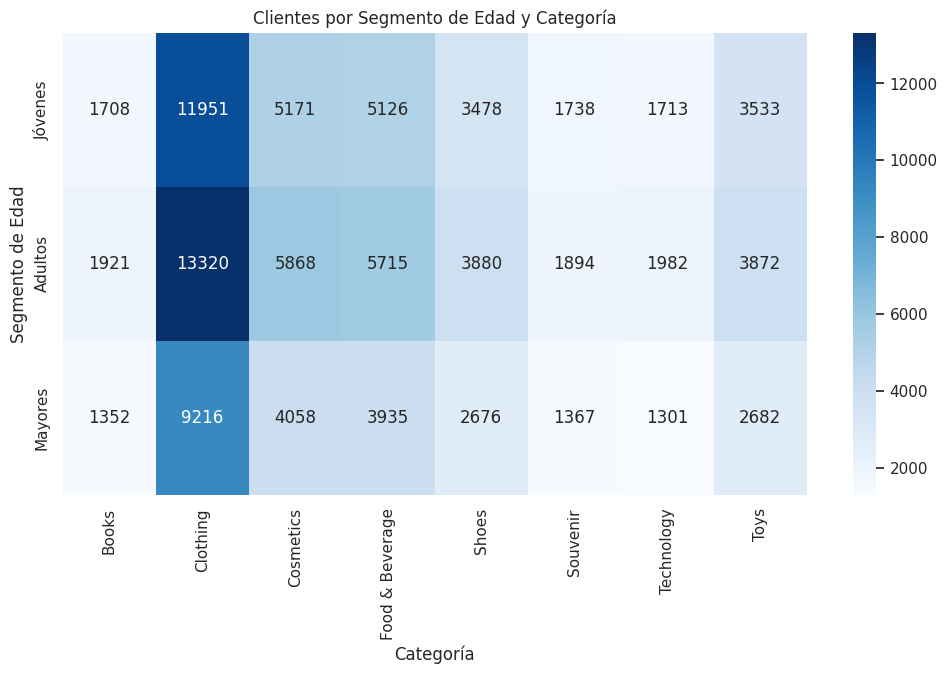

In [22]:
age_category_counts = df.groupby(['Segmento_Edad', 'category'])['customer_id'].nunique().unstack()
print("Cantidad de clientes por segmento de edad y categoría:\n", age_category_counts)

plt.figure(figsize=(12, 6))
sns.heatmap(age_category_counts, annot=True, cmap='Blues', fmt='g')
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']
plt.title('Clientes por Segmento de Edad y Categoría')
plt.xlabel('Categoría')
plt.ylabel('Segmento de Edad')
plt.show()


Segmento de edad y método de pago

<ipython-input-23-48a9ae7b323e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_payment_counts = df.groupby(['Segmento_Edad', 'payment_method'])['customer_id'].nunique().unstack()


Cantidad de clientes por segmento de edad y método de pago:
 payment_method   Cash  Credit Card  Debit Card
Segmento_Edad                                 
Jóvenes         15361        12075        6982
Adultos         17141        13536        7775
Mayores         11945         9320        5322


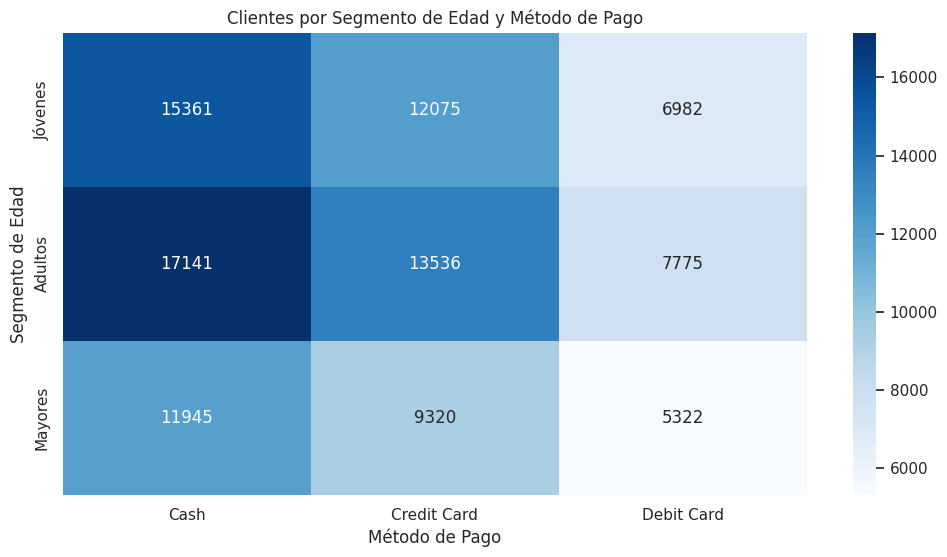

In [23]:
age_payment_counts = df.groupby(['Segmento_Edad', 'payment_method'])['customer_id'].nunique().unstack()
print("Cantidad de clientes por segmento de edad y método de pago:\n", age_payment_counts)

plt.figure(figsize=(12, 6))
sns.heatmap(age_payment_counts, annot=True, cmap='Blues', fmt='g')
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']
plt.title('Clientes por Segmento de Edad y Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Segmento de Edad')
plt.show()

 Las relaciones entre las variables dejan en evidencia que existen diferentes segmentos de valor, por ejemplo, en segmento de edad y el método de pago se ve que los adultos utilizan más el efectivo, seguido de tarjeta de crédito. De igual forma, el segmento de edad y categoria muestra que Çlothing es el producto que más se consumen por las personas adultas, seguido por Cosmetics.


## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

<ipython-input-24-6d3beed7142e>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_counts = df.groupby(['Segmento_Edad', 'Agrupa'])['customer_id'].nunique().unstack()


Cantidad de clientes por segmento de edad y categoría:
 Agrupa         Comida  Cosméticos  Libros   Ropa  Tecnología/Entretenimiento  \
Segmento_Edad                                                                  
Jóvenes          5126        5171    1708  11951                        6984   
Adultos          5715        5868    1921  13320                        7748   
Mayores          3935        4058    1352   9216                        5350   

Agrupa         Zapatos  
Segmento_Edad           
Jóvenes           3478  
Adultos           3880  
Mayores           2676  


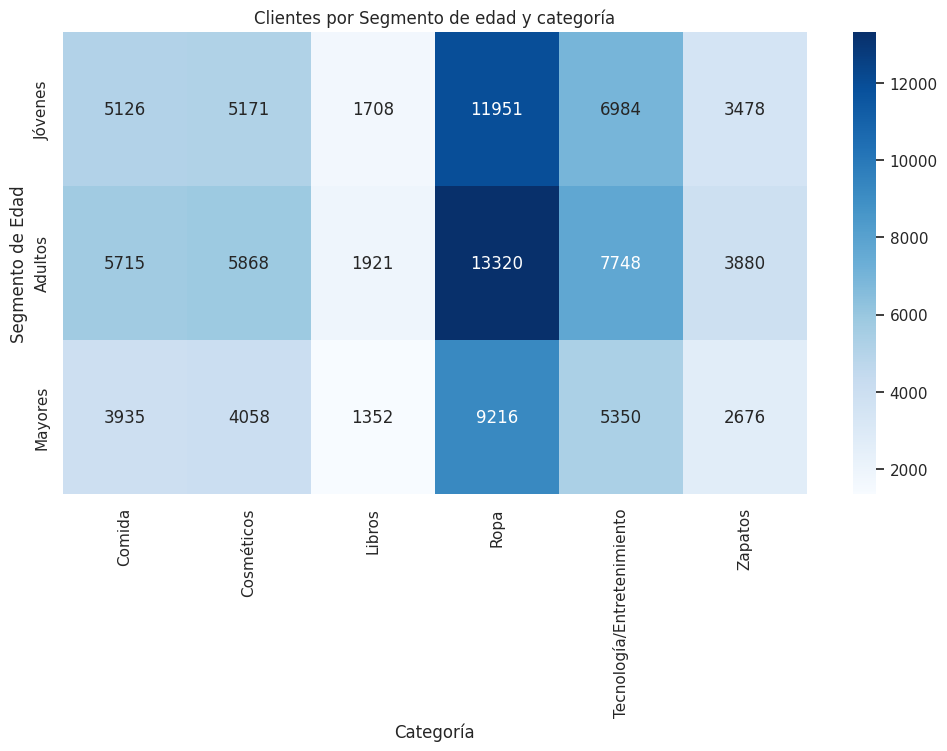

In [24]:
df['Agrupa'] = df['category'].replace ({
                  'Books': 'Libros',
                  'Clothing': 'Ropa',
                  'Cosmetics': 'Cosméticos',
                  'Food & Beverage': 'Comida',
                  'Shoes': 'Zapatos',
                  'Souvenir': 'Tecnología/Entretenimiento',
                  'Technology': 'Tecnología/Entretenimiento',
                  'Toys': 'Tecnología/Entretenimiento',})

age_category_counts = df.groupby(['Segmento_Edad', 'Agrupa'])['customer_id'].nunique().unstack()
print("Cantidad de clientes por segmento de edad y categoría:\n", age_category_counts)

plt.figure(figsize=(12, 6))
sns.heatmap(age_category_counts, annot=True, cmap='Blues', fmt='g')
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']
plt.title('Clientes por Segmento de edad y categoría')
plt.xlabel('Categoría')
plt.ylabel('Segmento de Edad')
plt.show()

Se unieron en Tecnología/Entretenimiento los Souvenir, Toys y Technology ya que como lo dice el nombre al que se agrupo estas variables se parecen en su contenido y se vuelve más sencillo en su análisis.

## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

In [25]:
def asignar_segmento(row):
    return f"{row['Segmento_Edad']}_{row['category']}"

df['Segmento_Comb'] = df.apply(asignar_segmento, axis=1)
seg_counts = df['Segmento_Comb'].value_counts().reset_index()
seg_counts.columns = ['Segmento_Comb', 'Cantidad']
seg_counts


,Segmento_Comb,Cantidad
0,Adultos_Clothing,13320
1,Jóvenes_Clothing,11951
2,Mayores_Clothing,9216
3,Adultos_Cosmetics,5868
4,Adultos_Food & Beverage,5715
5,Jóvenes_Cosmetics,5171
6,Jóvenes_Food & Beverage,5126
7,Mayores_Cosmetics,4058
8,Mayores_Food & Beverage,3935
9,Adultos_Shoes,3880


La combinación que ofrece el perfil más completo es la edad promedio con el producto más comprado por esa edad, asimismo, teniendo en cuenta la ubicación del local la campaña de marketing se puede enfocar en esos items y disponer de esos productos y ofrecerlos a ese público objetivo. Gracias a esa información la campaña de marketing se puede enfocar en esos items y lograr tener resultads exitosos.

## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

Precio promedio por Segmento Combinado:
              Segmento_Comb  Precio_Promedio
0             Adultos_Books        45.181858
1          Adultos_Clothing       905.106162
2         Adultos_Cosmetics       122.506612
3   Adultos_Food & Beverage        15.698236
4             Adultos_Shoes      1813.348688
5          Adultos_Souvenir        34.267207
6        Adultos_Technology      3175.428860
7              Adultos_Toys       107.186777
8             Jóvenes_Books        46.177342
9          Jóvenes_Clothing       895.670126
10        Jóvenes_Cosmetics       122.671951
11  Jóvenes_Food & Beverage        15.690000
12            Jóvenes_Shoes      1813.969822
13         Jóvenes_Souvenir        35.561203
14       Jóvenes_Technology      3092.381786
15             Jóvenes_Toys       107.641732
16            Mayores_Books        45.349149
17         Mayores_Clothing       902.291328
18        Mayores_Cosmetics       122.080197
19  Mayores_Food & Beverage        15.610254
20            M

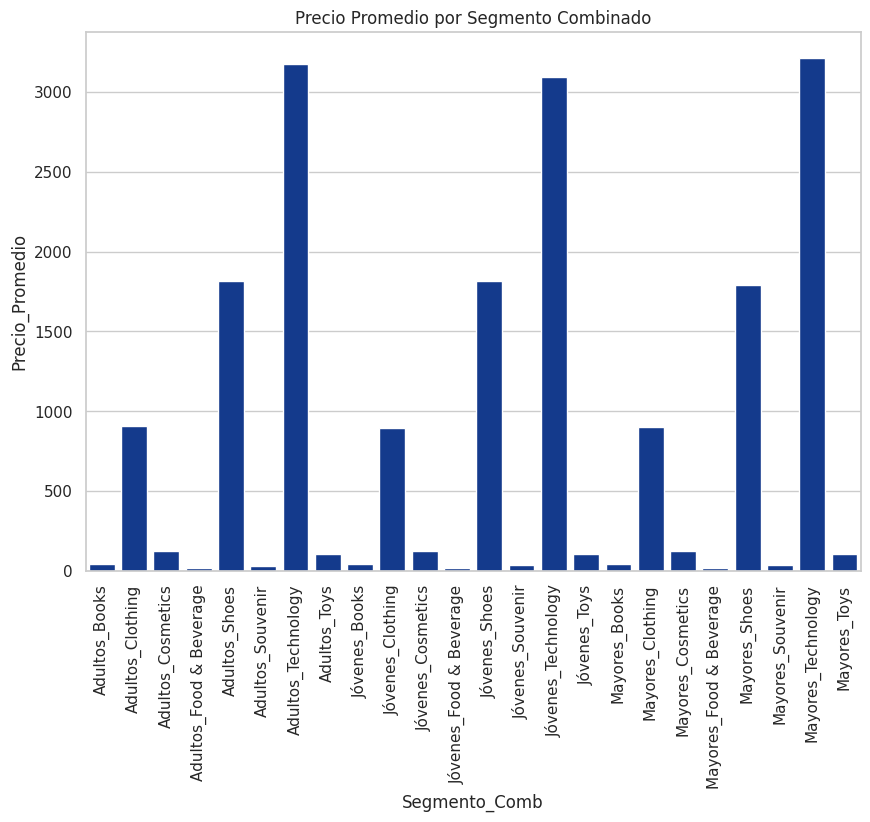

In [32]:
promedio_segmentos = df.groupby('Segmento_Comb')['price'].mean().reset_index()
promedio_segmentos.columns = ['Segmento_Comb', 'Precio_Promedio']
print("Precio promedio por Segmento Combinado:")
print(promedio_segmentos)

plt.figure(figsize=(10,7))
sns.barplot(x='Segmento_Comb', y='Precio_Promedio', data=promedio_segmentos)
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']
plt.title('Precio Promedio por Segmento Combinado')
plt.xticks(rotation=90)
plt.show()

¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?
El segmento que más destaca por tener un alto valor es technology

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

Para comenzar el segmento con mayor potencial en términos de valor y frecuencia de compra es  

Siguiendo con las estrategías de marketing que implementaría para segmentos con bajo valor promedio yo realizar un análisis de mercado para conocer por qué no se están vendiendo esos productos, posteriiormente, haría marketing digital donde invierta en ads para que le lleguen a todos los clientes. Asimismo haría descuentos o 2x1 por algunos días de esos productos para que conozcan más los productos y se genere interés y finalmente hacerle seguimiento a esa campaña.

Por otro lado, el compartamiento de compra influye la categoría de producto ya que se conoce cuáles son los productos más vendidos y que generan más margen de ganancia, asimismo, al conocer la unibación de local se puede conocer cuál es el que se debe potencializar tanto para que compren más en ese lugar como para seguir mandando más stock de los productos más vendidos al tener más flujo de ventas.



## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!

Clothing es el segmento con mayor potencial en términos de valor y frecuencia de compra, ya que es el producto que más ingreso genera en la empresa y se venden más unidades. Teniendo en cuenta la base de datos que acabamos de analizar y el historial de ventas, primero realizaría una campaña de fidelización con los clientes si quiero que este segmento siga generando los mismos ingresos en la compañia o genere el mismo margen de ganancia, con esta campaña conozco quiénes son los que más compran, la frecuencia de compra y el lugar donde lo hacen, asimismo, planetaria objetivos SMART junto a los KPIS que me ayudarían a monitorear si se está logrando lo planetado. De igual forma realizaría un email-marketing con promociones, productos nuevos y algunas noticias para que los clientes tengan recordación de marca y se generen más ventas.